In [1]:
import pandas as pd
import numpy as np

In [4]:
# Read the csv file and save it as df
df = pd.read_csv('reviews.csv')

df

,Unnamed: 0,Product ID,Product Name,Username,Rating,DateTime,Comment ID,Comments
0,0,738907d7-39a7-403e-a8a6-1b0933baf48f,SPRISE Premium Wireless Bluetooth Earphone Col...,i*****b,5,2023-09-02 01:13,3aacfcce-8062-403d-b903-7edecee7cd1a,Best buy ever\nit looks great works great\nthe...
1,1,738907d7-39a7-403e-a8a6-1b0933baf48f,SPRISE Premium Wireless Bluetooth Earphone Col...,jessylim70,5,2023-07-21 23:33,a34bed49-2914-4998-959f-0ba884aafcd5,Item received in good condition.\nBought durin...
2,2,738907d7-39a7-403e-a8a6-1b0933baf48f,SPRISE Premium Wireless Bluetooth Earphone Col...,s*****b,5,2023-05-08 19:37,53166827-9814-4518-aee9-06c23cf75b70,Value For Money: yes\nBest Feature(s): comfort...
3,3,738907d7-39a7-403e-a8a6-1b0933baf48f,SPRISE Premium Wireless Bluetooth Earphone Col...,a*****w,5,2023-06-13 11:03,39204448-f31c-4dc2-aaf2-4478fe0ead89,Impressed with the quality and looks really ni...
4,4,738907d7-39a7-403e-a8a6-1b0933baf48f,SPRISE Premium Wireless Bluetooth Earphone Col...,yuejun1,5,2023-09-13 22:10,3efea8bd-318b-466a-b123-a8989dd56fb9,Value For Money: yes!\nPerformance: feels grea...
...,...,...,...,...,...,...,...,...
27687,27687,bf476063-e681-4700-b2a1-ad8a416a7cb8,Y08 Macaron Wireless Foldable Headphones with ...,victor241090,5,2023-07-11 20:46,NaN,NaN
27688,27688,bf476063-e681-4700-b2a1-ad8a416a7cb8,Y08 Macaron Wireless Foldable Headphones with ...,nay.n5,5,2023-07-11 21:59,NaN,NaN
27689,27689,bf476063-e681-4700-b2a1-ad8a416a7cb8,Y08 Macaron Wireless Foldable Headphones with ...,8w_1tppv5h,5,2023-07-12 03:18,NaN,NaN
27690,27690,bf476063-e681-4700-b2a1-ad8a416a7cb8,Y08 Macaron Wireless Foldable Headphones with ...,anagrazielaferreirafaria,5,2023-07-12 03:18,NaN,NaN


In [5]:
# Get the no. of products scraped
print("Number of products: {}".format(df["Product ID"].nunique()))

Number of products: 111


# 1. Username table

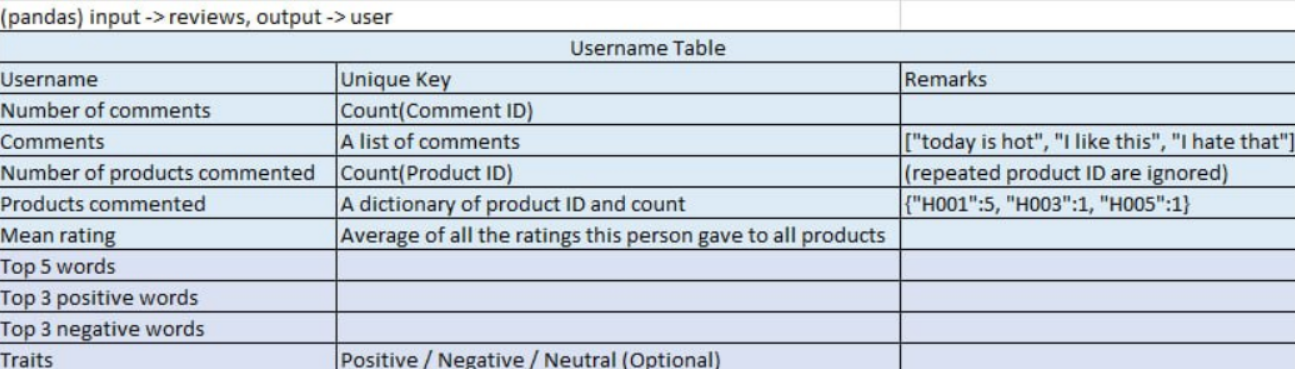

## 1.1 Count number of review

In [12]:
# Count number of comments for each user
count_number_of_comments_df = df.groupby('Username')['Rating'].nunique().reset_index(name='Number of Comments')

count_number_of_comments_df

,Username,Number of Comments
0,.*****.,1
1,.*****9,1
2,.*****f,1
3,.*****j,1
4,.*****v,1
...,...,...
19973,zzwn1fsm5x,1
19974,zzzfeng,1
19975,zzzjj.e,1
19976,zzzkelzel,1


## 1.2 Review list

In [13]:
# Group/Match the username with their comments and save the comments into a list
user_comments = df.groupby('Username')['Comments'].agg(list).reset_index()

# Create a new DataFrame to store the results
list_of_comments_df = pd.DataFrame({'Username': user_comments['Username'],
                          'Comments': user_comments['Comments']})

list_of_comments_df

,Username,Comments
0,.*****.,[Received but not tested if working or not]
1,.*****9,"[not the cheapest , included tool is nice but ..."
2,.*****f,[nan]
3,.*****j,[nan]
4,.*****v,[nan]
...,...,...
19973,zzwn1fsm5x,[nan]
19974,zzzfeng,[nan]
19975,zzzjj.e,[nan]
19976,zzzkelzel,[nan]


## 1.3 Count number of products each user commented

In [14]:
# Count number of comments for each user
count_number_of_products_df = df.groupby('Username')['Product ID'].nunique().reset_index(name='Number of Products Commented/Rated')

# Remove duplicate rows based on both 'Username' and 'Product ID'
count_number_of_products_df = count_number_of_products_df.drop_duplicates(subset=['Username', 'Number of Products Commented/Rated'])

count_number_of_products_df

,Username,Number of Products Commented/Rated
0,.*****.,1
1,.*****9,1
2,.*****f,1
3,.*****j,1
4,.*****v,1
...,...,...
19973,zzwn1fsm5x,1
19974,zzzfeng,1
19975,zzzjj.e,1
19976,zzzkelzel,1


## 1.4 Dictionary of products commented

In [15]:
# Group by 'Username' and 'Product ID' and count the number of comments
comment_counts = df.groupby(['Username', 'Product ID']).size().reset_index(name='Comments count')

# Create a nested dictionary
result_dict = {}

for _, row in comment_counts.iterrows():
    username = row['Username']
    productid = row['Product ID']
    count = row['Comments count']

    if username not in result_dict:
        result_dict[username] = {}

    result_dict[username][productid] = count

# Convert the dictionary into a DataFrame
user_product_counted_comments_df = pd.DataFrame(list(result_dict.items()), columns=['Username', 'Products Commented/Rated'])

# Display the result
user_product_counted_comments_df


,Username,Products Commented/Rated
0,.*****.,{'c6248603-e4db-403f-a7d2-4139e8463d34': 1}
1,.*****9,{'51f70b33-555b-4d40-ad73-a4f19446fc73': 1}
2,.*****f,{'b17e829b-3318-49c4-8a94-edc482f7733c': 1}
3,.*****j,{'59331d97-d641-4a8b-8d1d-4f7296f1978e': 1}
4,.*****v,{'6b40a572-7c11-45bb-937c-d3460fc70c36': 1}
...,...,...
19973,zzwn1fsm5x,{'f763ffa4-ab7e-4bda-8b31-310c402ea36b': 1}
19974,zzzfeng,{'51f70b33-555b-4d40-ad73-a4f19446fc73': 1}
19975,zzzjj.e,{'3aa481f9-6e8d-40aa-b4a9-8022ae11b332': 1}
19976,zzzkelzel,{'10b5c89d-c320-4743-b6db-7962216594f9': 1}


## 1.5 Mean Ratings for each user

In [16]:
user_ratings_df = df.groupby('Username')['Rating'].mean().reset_index(name='Mean Rating')

user_ratings_df

,Username,Mean Rating
0,.*****.,5.0
1,.*****9,5.0
2,.*****f,5.0
3,.*****j,5.0
4,.*****v,5.0
...,...,...
19973,zzwn1fsm5x,5.0
19974,zzzfeng,5.0
19975,zzzjj.e,5.0
19976,zzzkelzel,5.0


## 1.6 Group all dataframes into 1 and save into .csv

In [18]:
concatenated_df = pd.concat([count_number_of_comments_df,
                             list_of_comments_df, 
                             count_number_of_products_df, 
                             user_product_counted_comments_df,
                             user_ratings_df],  axis=1)

concatenated_df = concatenated_df.iloc[:, ~concatenated_df.columns.duplicated()]

concatenated_df.to_csv("username.csv")
concatenated_df

,Username,Number of Comments,Comments,Number of Products Commented/Rated,Products Commented/Rated,Mean Rating
0,.*****.,1,[Received but not tested if working or not],1,{'c6248603-e4db-403f-a7d2-4139e8463d34': 1},5.0
1,.*****9,1,"[not the cheapest , included tool is nice but ...",1,{'51f70b33-555b-4d40-ad73-a4f19446fc73': 1},5.0
2,.*****f,1,[nan],1,{'b17e829b-3318-49c4-8a94-edc482f7733c': 1},5.0
3,.*****j,1,[nan],1,{'59331d97-d641-4a8b-8d1d-4f7296f1978e': 1},5.0
4,.*****v,1,[nan],1,{'6b40a572-7c11-45bb-937c-d3460fc70c36': 1},5.0
...,...,...,...,...,...,...
19973,zzwn1fsm5x,1,[nan],1,{'f763ffa4-ab7e-4bda-8b31-310c402ea36b': 1},5.0
19974,zzzfeng,1,[nan],1,{'51f70b33-555b-4d40-ad73-a4f19446fc73': 1},5.0
19975,zzzjj.e,1,[nan],1,{'3aa481f9-6e8d-40aa-b4a9-8022ae11b332': 1},5.0
19976,zzzkelzel,1,[nan],1,{'10b5c89d-c320-4743-b6db-7962216594f9': 1},5.0


# References

In [ ]:
#usernameTable.iloc[1]
---
#usernameTable.['Username']
listOfUsernames=df['Username'].values
listOfComments = df['Comments'].values

#print("Value of row 1")
#display(df.iloc[1])
---
usernameTable = df.filter(['Username', 'Comments', 'Comment ID'], axis=1)
usernameTable


---
testingTable = df.filter(['Username', 'Comments', 'Comment ID'], axis=1)
testingTable = testingTable[testingTable['Username'].str.contains('\*|Shopee User') == False]

# Count number of comments for each user
count_number_of_comments = testingTable.groupby('Username')['Comment ID'].nunique().reset_index()

# Sort
sorted_counts = count_number_of_comments.sort_values(by='Comment ID', ascending=False)
top = sorted_counts.head(20)
top


---
testingTable = df.filter(['Username', 'Comments', 'Product ID'], axis=1)
testingTable = testingTable[testingTable['Username'].str.contains('\*|Shopee User') == False]

# Remove duplicate rows based on both 'userid' and 'productid'
testingTable = testingTable.drop_duplicates(subset=['Username', 'Product ID'])

# Count number of comments for each user
count_number_of_products = testingTable.groupby('Username')['Product ID'].nunique().reset_index()

# Sort
sorted_counts = count_number_of_products.sort_values(by='Product ID', ascending=False)
top = sorted_counts.head(20)
top